# In depth: Linear Regression

# Supervised & Unsupervised Machine Learning:
Within the field of machine learning, there are two main types of tasks: supervised, and unsupervised. The main difference between the two types is that supervised learning is done using a ground truth, or in other words, we have prior knowledge of what the output values for our samples should be. Therefore, the goal of supervised learning is to learn a function that, given a sample of data and desired outputs, best approximates the relationship between input and output observable in the data. Unsupervised learning, on the other hand, does not have labeled outputs, so its goal is to infer the natural structure present within a set of data points.
Supervised learning is typically done in the context of classification, when we want to map input to output labels, or regression, when we want to map input to a continuous output.
In both regression and classification, the goal is to find specific relationships or structure in the input data that allow us to effectively produce correct output data. Note that “correct” output is determined entirely from the training data, so while we do have a ground truth that our model will assume is true, it is not to say that data labels are always correct in real-world situations. Noisy, or incorrect, data labels will clearly reduce the effectiveness of your model.

To learn more about Supervised and Unsupervised Learning, click on the link below:
[Supervised & Unsupervised Learning](https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d)

# Linear Regression
Regression is a ‘Supervised machine learning’ algorithm used to predict continuous features.

Linear regression is the simplest regression algorithm that attempts to model the relationship between dependent variable and one or more independent variables by fitting a linear equation/best fit line to observed data.

Based on the number of input features, Linear regression could be of two types:

*   Simple Linear Regression (SLR)
*   Multiple Linear Regression (MLR)

In Simple Linear Regression (SLR), we will have a single input variable based on which we predict the output variable. Where in Multiple Linear Regression (MLR), we predict the output based on multiple inputs.

Input variables can also be termed as Independent/predictor variables, and the output variable is called the dependent variable.

``Just as naive Bayes (discussed earlier in [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)) is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the **simplest form of a linear regression model (i.e., fitting a straight line to data)** but such models can be extended to model more complicated data behavior.''

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

## Simple Linear Regression (staright-line Fit)

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data:

### Home prices in Monroe Township (NJ-USA)

Purpose: Given the home prices find out the prices of homes whose area are:


1.   3300 square feet
2.   5000 sqaure feet

In order to do this, what we could do is actually plot the given data in a scatter plot then fit a linear line to those data, and given that we could find out the prices of any home with any square footage. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [3]:
data = pd.read_csv("homeprices.csv")

data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


## Let's plot our data to see how they look like:


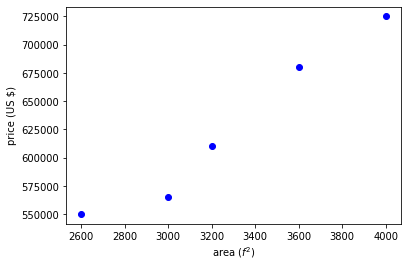

In [4]:
%matplotlib inline 
plt.xlabel('area ($f^2$)')
plt.ylabel('price (US $)')
plt.scatter(data.area,data.price, color = 'blue', marker = 'o')

## Linear regression analysis step:


1.   Create an object for linear regression
2.   Fit your data based on the model
3.   Prediction



In [5]:
reg = linear_model.LinearRegression() 
x = data.area.values.reshape(-1,1)
y = data.price.values.reshape(-1, 1)
reg.fit(x,y)

LinearRegression()

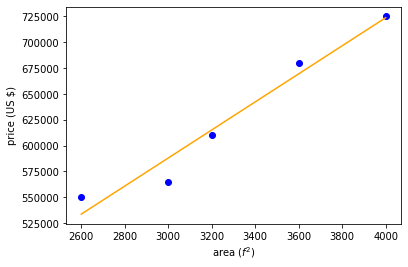

In [6]:
%matplotlib inline 
plt.xlabel('area ($f^2$)')
plt.ylabel('price (US $)')
plt.scatter(data.area,data.price, color = 'blue', marker = 'o')
plt.plot(x, reg.predict(x), color = 'orange')

## Predict price of home with square footage of 3300

In [7]:
predicted3 = reg.predict([[3300]])

print('Predicted hoime price: ', predicted3)

Predicted hoime price:  [[628715.75342466]]


## Let's see how the predicted model works: 

The following linear model has been used to calculate the coefficients for our model:
 y = m x + b

## Coeffients for our model:

In [8]:
print('slope: ', reg.coef_[0])
print('intercept: ', reg.intercept_)

slope:  [135.78767123]
intercept:  [180616.43835616]


## Two exmaples:

Calculate price of a the home with 5000 square footage:

In [9]:
m = reg.coef_[0] #slope
b = reg.intercept_ #intercept
x = 3300 #area
y = m*x +b #home price
print('home price with 3300 square footage equals ', y)

home price with 3300 square footage equals  [628715.75342466]


Calculate price of the home with 5000 square footage:

In [10]:
predicted5 = reg.predict([[5000]])

print('Predicted hoime price: ', predicted5)

Predicted hoime price:  [[859554.79452055]]


In [11]:
m = reg.coef_[0] #slope
b = reg.intercept_ #intercept
x = 5000 #area
y = m*x +b #home price
print('home price with 5000 square footage equals ', y)

home price with 5000 square footage equals  [859554.79452055]


## Example:
Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

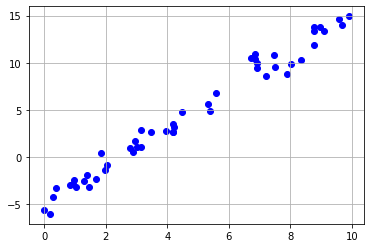

In [12]:
rng = np.random.RandomState(1) # Controlled random numbers by seed=1 

# Random values in a given shape.Create an array of the given shape and populate it with random samples from a uniform distribution over[0, 1)
x = 10 * rng.rand(50) 

y = 2 * x - 5 + rng.randn(50)  # The function is y = 2 x - 5 plus some noise
plt.scatter(x, y, color = 'blue');
plt.grid()

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

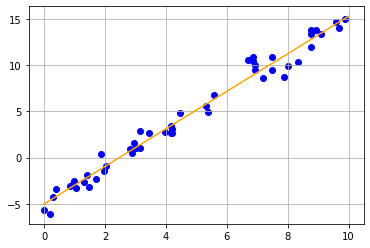

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y) # the features need to be formatted as columns 

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis]) # the features need to be formatted as columns

plt.scatter(x, y, color = 'blue')
plt.plot(xfit, yfit, color = 'orange');
plt.grid()

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [14]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


We see that the results are very close to the inputs, as we might hope.

# Multiple Linear Regression, Multiple Regression (MLR or MR):
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is similar to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions. It is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. MLR examines how multiple independent variables are related to one dependent variable. 

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

## Example for MLR

Consider the following data:
### Home prices in Monroe Township (NJ-USA)

Purpose: Given thesex home prices find out the prices of a home that has:

1.   3000 sqr ft area, 3 bedrooms, 40 years old
2.   2500 sqr ft area, 4 bedrooms, 5 years old



In [15]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [16]:
df = pd.read_csv("MLR_homeprices.csv")
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


### As we could see from our data sets, there are two things we should notice:

1.   There is a missing data point
2.   There is a linear relatioonship between each of these features and the target variable which is price. For example, as the home gets older, the price tends to go down.

If we go through the math, we could set up the following linear relationsip:


price = $m_{1}$ * area + $m_{2}$ * bedrooms + $m_{3}$ * age + b


Here, price is a dependant variable (target variable) and area, bedroom, and age are independant varibales (features). $m_{i}$ for i = 1,2,3 are coeffienets and b is an intercept. 

### Our task:

### 1.   Data Processing: Handling Nan values
### 2.   Linear regression using multiple variables

Let's get started by starting from our first task: Based off our data filling the missing cell with median is a proper solution.  






In [17]:
import math

bedroom_median = math.floor(df.bedroom.median()) # round down to get an integer
print('bedroom median is ', bedroom_median)

bedroom median is  3


In [18]:
df.bedroom = df.bedroom.fillna(bedroom_median)
df

,area,bedroom,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Let's create a linear regression object to get started with our second task:

In [19]:
reg = linear_model.LinearRegression()


x1 = df.area.values.reshape(-1,1)
x2 = df.bedroom.values.reshape(-1,1)
x3 = df.age.values.reshape(-1,1)

x = np.concatenate((x1, x2, x3), axis=1)

y = df.price.values.reshape(-1, 1)

reg.fit(x, y) # used to train our model using a training set

LinearRegression()

In [20]:
reg.coef_[0]

array([   137.25, -26025.  ,  -6825.  ])

In [21]:
reg.intercept_

array([383725.])

### Ex. Home price of a 3bd, 40 yrs old, 3000 $f^2$?

In [22]:
reg.predict([[3000, 3, 40]])

array([[444400.]])

Let's see how these numbers has been calculated:

In [23]:
m = reg.coef_[0] #slope
b = reg.intercept_ #intercept
x1 = 3000 #area
x2 = 3 # bedroom
x3 = 40 # age
y = m[0]*x1 + m[1]*x2 + m[2]*x3 + b #home price
print('Home price with', x2, 'bedrooms', x3, 'years old, and', x1, 'square footage equals ', '$',round(y[0]),'.')

Home price with 3 bedrooms 40 years old, and 3000 square footage equals  $ 444400 .


### Ex. Home price of a 4bd, 5 yrs old, 2500 $f^2$?

In [24]:
reg.predict([[2500, 4, 5]])

array([[588625.]])

In [25]:
m = reg.coef_[0] #slope
b = reg.intercept_ #intercept
x1 = 2500 #area
x2 = 4 # bedroom
x3 = 5 # age
y = m[0]*x1 + m[1]*x2 + m[2]*x3 + b #home price
print('Home price with', x2, 'bedrooms', x3, 'years old, and', x1, 'square footage equals ', '$',round(y[0]),'.')

Home price with 4 bedrooms 5 years old, and 2500 square footage equals  $ 588625 .


### Textbook Example

In [26]:
rng = np.random.RandomState(1) # controlled produce of random numbers with seed=1
X = 10 * rng.rand(100, 3) # creating 100*3 matrix
print('Feature matrix:')
print(X[0:5]) # print first 5 rows

y = 0.5 + np.dot(X, [1.5, -2., 1.]) # The equation is y = 0.5 + 1.5*X1 - 2.0*X2 + 1.0*X3

print('Target vector:')
print(y[0:5]) # first 5 rows of y-data

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

Feature matrix:
[[4.17022005e+00 7.20324493e+00 1.14374817e-03]
 [3.02332573e+00 1.46755891e+00 9.23385948e-01]
 [1.86260211e+00 3.45560727e+00 3.96767474e+00]
 [5.38816734e+00 4.19194514e+00 6.85219500e+00]
 [2.04452250e+00 8.78117436e+00 2.73875932e-01]]
Target vector:
[ -7.65001605   3.02325672   0.35036337   7.05055573 -13.72168905]
0.5000000000000056
[ 1.5 -2.   1. ]


In [27]:
temp = -y + 0.5 + 1.5*X[:,0] - 2.0*X[:,1] + 1.0*X[:,2] # difference between data produced by the predicted model and original data
np.max(np.abs(temp))

1.9984014443252818e-15

Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) and [Feature Engineering](05.04-Feature-Engineering.ipynb).
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

In [28]:
import pandas as pd
from sklearn import linear_model

In [29]:
dataset = pd.read_csv("position_salaries.csv")
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [30]:
X = dataset.iloc[:,1:2].values #dataframe.iloc[:,start_col:end_col]
y = dataset.iloc[:,2].values


Let's train our model with a basic linear model:

In [31]:
from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

Now let's train our model with a Polynomial Regression model:

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(degree=5)
X_poly = poly_model.fit_transform(X) #fit_transform function

model2 = LinearRegression()
model2.fit(X_poly, y)

LinearRegression()

Visualizing the linear Regression Results:

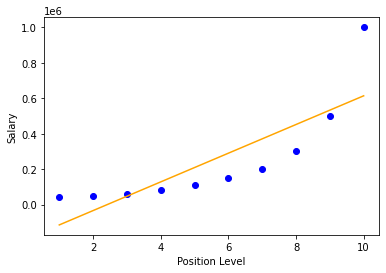

In [33]:
plt.scatter(X, y, color = "blue")
plt.plot(X, model.predict(X), color = "orange")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualizing the polynomial regression Results:

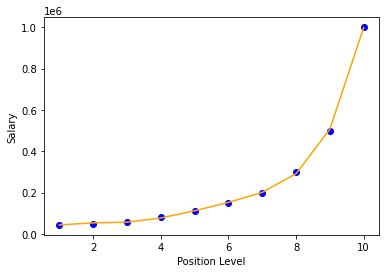

In [34]:
plt.scatter(X, y, color = "blue")
plt.plot(X, model2.predict(poly_model.fit_transform(X)), color = "orange")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

let's check the difference between polynomial and linear regression models:

In [35]:
#linear model prediction
model.predict([[6.5]])

array([330378.78787879])

In [36]:
#polynomial regression model prediction
model2.predict(poly_model.fit_transform([[6.5]]))

array([174878.07765172])

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [37]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4]) # defining a numpy array of [2, 3, 4]

poly = PolynomialFeatures(3, include_bias=False) 
poly.fit_transform(x[:, None]) #format the 1D x array as a 2D with None column

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in [Feature Engineering](05.04-Feature-Engineering.ipynb), the cleanest way to accomplish this is to use a pipeline.
Let's make a 7th-degree polynomial model in this way:

### Pipeline:

By using a list of (key, value) pairs, we can build a pipeline. Here, the key is the name you want to give and the value is the estimator object.

In [38]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression()) 

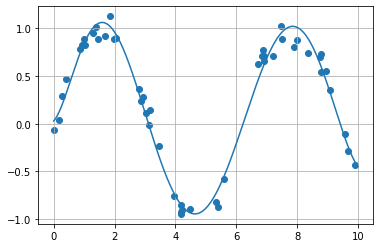

In [39]:
rng = np.random.RandomState(1) # some random numbers by seed=1
x = 10 * rng.rand(50) #shape is 50, 
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y) # rows need to be formatted as columns
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.grid()

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.06-gaussian-basis.png?raw=1)
[figure source in Appendix](#Gaussian-Basis)

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data. These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

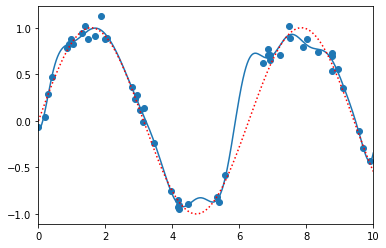

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

#__init__ is the constructor for a class 
#The self parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class
#self.N and self.width_factor are members of the GaussianFeatures object (accessible for the lifetime of the object)
# width_factor: FWHM
# N: number of Gaussians 


    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

#The static method works like normal function but somehow belongs to the class: static method usually does not use variables defined in the 
#class but lots of the times we just want to put the method into class definition because it has logical link (loosely coupled) to the class


    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

#Fitting function
#X : {array-like, sparse matrix}, shape (n_samples, n_features) The training input samples.
#y : None. There is no need of a target in a transformer, yet the pipeline API requires this parameter.     

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

#Transform function.
#X: {array-like, sparse-matrix}, shape (n_samples, n_features) The input samples.
#X_transformed: array, shape (n_samples, n_features)
#The array containing the element-wise square roots of the values in ``X``.

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    


gauss_model = make_pipeline(GaussianFeatures(20), # Use a mixture of 20 Gaussians
                            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
xvalues = np.linspace(0, 10, 1000)
plt.plot(xvalues, np.sin(xvalues), ":r")

plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

## The Loss Function for Linear Regression

Let's write down the loss funstion for linear regression. Let's say we have $n$ feature variables. Our prediction $\hat y$ for the target variable $y$ will be
$$
\hat y = w_0 + \sum_{i=1}^n w_i x_i \equiv \sum_{i=0}^n w_i x_i
$$
if we include a fake additional feature variable $x_0\equiv 1$.

Let us say we have $m$ samples (observations). This means our features are organized in the dataframe
$$
\begin{matrix}
Sample & Feature\ 0 & Feature\ 1 & Feature\ 2 & ... & Feature\ n & Target  & Prediction  \\
1      & 1 & x_1^{(1)}  & x_2^{(1)}  & ... & x_n^{(1)}  & y^{(1)} & \hat y^{(1)} \\
2      & 1 & x_1^{(2)}  & x_2^{(2)}  & ... & x_n^{(2)}  & y^{(2)} & \hat y^{(2)} \\
3      & 1 & x_1^{(3)}  & x_2^{(3)}  & ... & x_n^{(3)}  & y^{(3)} & \hat y^{(3)} & 1\\
...    & ...        & ...        & ... & ...        & ...     & ... & ...\\
m      & 1 & x_1^{(m)}  & x_2^{(m)}  & ... & x_n^{(m)}  & y^{(m)} & \hat y^{(m)}\\
\end{matrix}
$$
The loss function is the Root-Mean-Square-Error
$$
L = RMSE(\hat y,y) 
= \sqrt{\frac{1}{m}\sum_{k=1}^m \left[\hat y ^{(k)} - y^{(k)}\right]^2}
= \sqrt{\frac{1}{m}\sum_{k=1}^m \left[\left( \sum_{i=0}^n w_ix_i^{(k)} \right) - y^{(k)}\right]^2}
$$
This can be minimized analytically by taking derivatives with respect to $w_i$. To simplify the resulting equations, it is convenient to eliminate the square root and instead consider the equivalent loss function
$$
L = MSE(\hat y,y) 
= \frac{1}{m}\sum_{k=1}^m \left[\hat y ^{(k)} - y^{(k)}\right]^2
= \frac{1}{m}\sum_{k=1}^m \left[\left( \sum_{i=0}^n w_ix_i^{(k)} \right) - y^{(k)}\right]^2
$$
The exact minimization involves finding the inverse of an $n\times n$ matrix, which can be computationally prohibitive for large $n$. This is why the minimum is often found by gradient descent, see https://en.wikipedia.org/wiki/Gradient_descent.

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).
For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

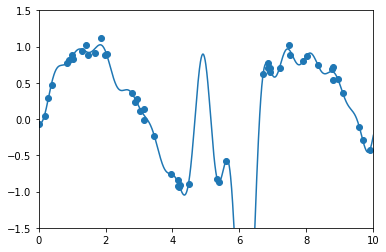

In [41]:
model = make_pipeline(GaussianFeatures(30),   # 30 Gaussians leads to overfitting 
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

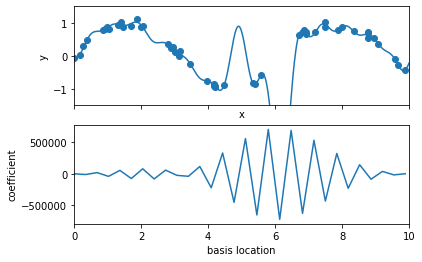

In [43]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

In the scikit-learn notation, the coefficients are denoted by $w_i$, so the modified cost function is
$$
L + P_2
%= \frac{1}{m}\sum_{k=1}^m \left[\hat y ^{(k)} - y^{(k)}\right]^2
= \frac{1}{m}\sum_{k=1}^m \left[\left( \sum_{i=0}^n w_ix_i^{(k)} \right) - y^{(k)}\right]^2
+ \alpha \sum_{i=1}^n w^2_i
$$

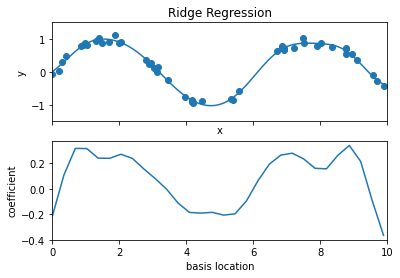

In [44]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

In the scikit-learn notation, the coefficients are denoted by $w_i$, so the modified cost function is
$$
L + P_1
%= \frac{1}{m}\sum_{k=1}^m \left[\hat y ^{(k)} - y^{(k)}\right]^2
= \frac{1}{m}\sum_{k=1}^m \left[\left( \sum_{i=0}^n w_ix_i^{(k)} \right) - y^{(k)}\right]^2
+ \alpha \sum_{i=1}^n |w_i|
$$

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


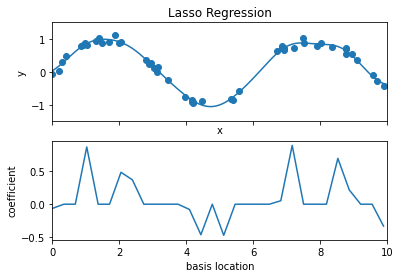

In [45]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).

### Elastic-Net regression (Both $L_1$ and $L_2$ regularization) 

One can also combine both regularizations together as
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet
$$
L + \rho P_1 + \frac{1}{2}(1-\rho) P_2
%= \frac{1}{2m}\sum_{k=1}^m \left[\hat y ^{(k)} - y^{(k)}\right]^2
= \frac{1}{2m}\sum_{k=1}^m \left[\left( \sum_{i=0}^n w_ix_i^{(k)} \right) - y^{(k)}\right]^2
+ \alpha \rho \sum_{i=1}^n |w_i|
+ \frac{\alpha (1-\rho)}{2}\sum_{i=1}^n w^2_i
$$
Here $\rho$ is the l1_ratio parameter controlling the relative importance of the $L_1$ and $L_2$ regularizations.


#Example on Ridge and Issao Regularization

Explain underfitting, overfitting and balanced fitting

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import warnings

warnings.filterwarnings('ignore')

In [57]:
dataset2 = pd.read_csv('Melbourne_housing_FULL.csv')
dataset2.head(5)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [55]:
dataset2.nunique() # sum of number of unique values in each row

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [56]:
dataset2.shape

(34857, 21)

In [60]:
# disregard useless columns

cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea', 
               'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']

dataset2  = dataset2[cols_to_use]

dataset2.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [61]:
dataset2.shape

(34857, 15)

In [62]:
# number of nan values

dataset2.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [65]:
#fill some nan columns to zero
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']

dataset2[cols_to_fill_zero] = dataset2[cols_to_fill_zero].fillna(0)
dataset2.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [68]:
# for landsize and building area, we calculate mean and fill nan values with mean value

dataset2['Landsize'] = dataset2['Landsize'].fillna(dataset2.Landsize.mean())
dataset2['BuildingArea'] = dataset2['BuildingArea'].fillna(dataset2.BuildingArea.mean())

In [69]:
dataset2.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [70]:
#since our dataset is huge if we drop nan values, we are still in good shape
dataset2.dropna(inplace=True)
dataset2.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [72]:
#Convert categorical variable into dummy/indicator variables. 
#here this is gonna drop first column when we do coding
dataset2 = pd.get_dummies(dataset2, drop_first=True)
dataset2.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
X = dataset2.drop('Price', axis=1)
y = dataset2['Price']

In [83]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y =  train_test_split(X, y, test_size=0.3, random_state=2)

In [84]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [85]:
# low score on test data
reg.score(test_X,test_y) 

0.13853683161570984

In [87]:
#large train score
reg.score(train_X,train_y) 

0.6827792395792723

Our model is clearly overfitting, since for our training data gives a good score, but for test samples, which has never seen before, it gives a horrible score. What do we do?

In [89]:
# Lasso, L1 regulariation
# tol = optimization continues until updates are smaller than tolerance
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [91]:
lasso_reg.score(test_X,test_y)

0.6636111369404489

In [92]:
lasso_reg.score(train_X,train_y)

0.6766985624766824

In [95]:
#Ridge, L2 Regulariozan 

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [96]:
ridge_reg.score(train_X, train_y)

0.6622376739684328

In [97]:
ridge_reg.score(test_X, test_y)

0.6670848945194958